# Uber_Analysis (EDA)

In [127]:
#Analysis and mathematical libraries
import numpy as np
import pandas as pd
#Visualizations' libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
#DateTime libraries
import datetime, time
#For handling missing values
import missingno as msno
#Escape warnings
import warnings
warnings.filterwarnings('ignore')



In [128]:
df = pd.read_csv('UberDataset (1).csv')

In [129]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [117]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


# Handling Missing Values

In [91]:
df.columns = df.columns.str.replace("*","")

In [92]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [94]:
df.shape

(1156, 7)

In [95]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [96]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

<Axes: >

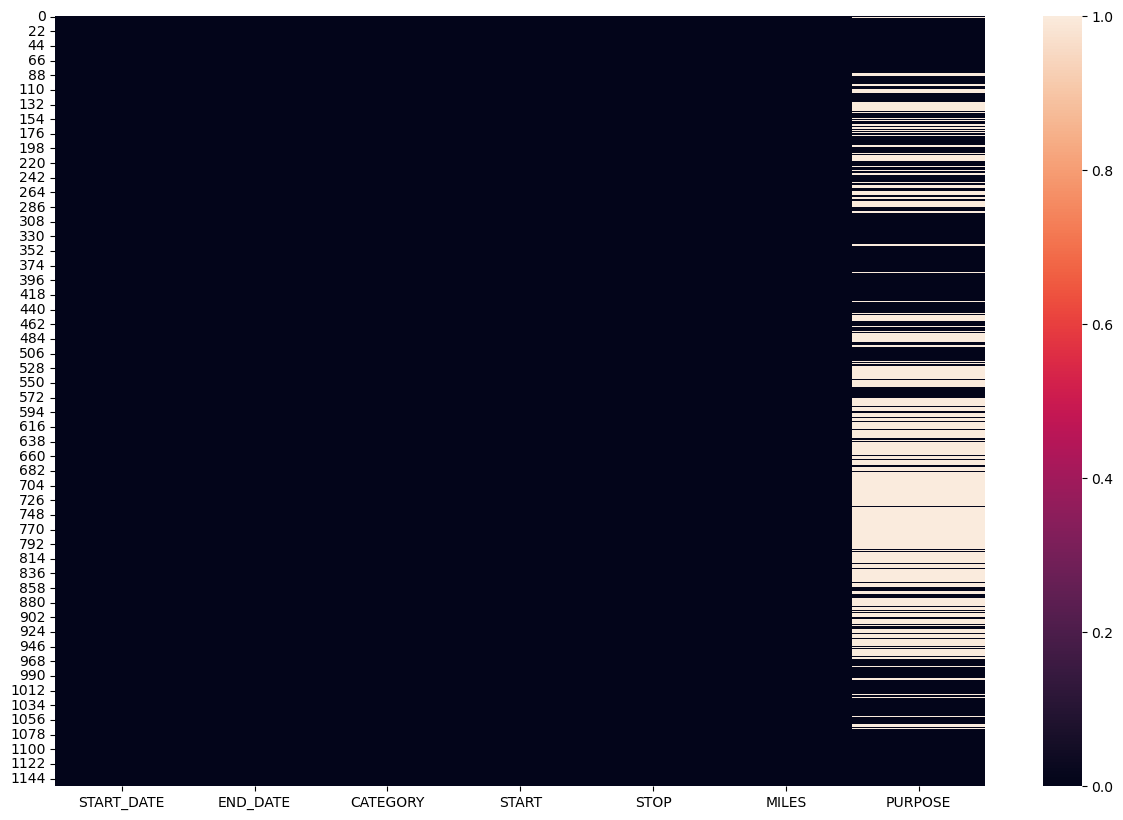

In [97]:
# show a null value in datasets
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 1, '1156'),
  Text(1, 1, '1155'),
  Text(2, 1, '1155'),
  Text(3, 1, '1155'),
  Text(4, 1, '1155'),
  Text(5, 1, '1156'),
  Text(6, 1, '653')])

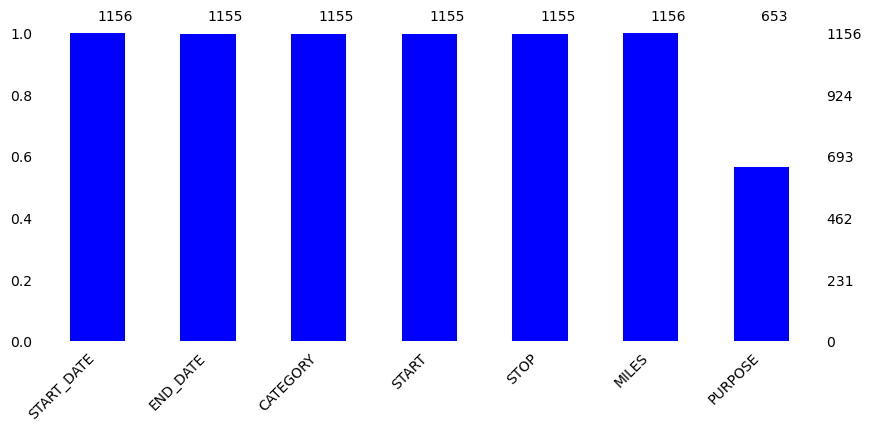

In [98]:
msno.bar(df, figsize = (10,4), fontsize = 10, color = 'b')
plt.xticks(rotation = 0)

In [99]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

In [11]:
#delet the null value in rows on some columns
df.dropna(axis=0, subset=['END_DATE','CATEGORY','START','STOP'], how='all', inplace=True)

In [12]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [63]:
# full the null value in dataset by way ffil(forword fill)
df['PURPOSE'].fillna(method = 'ffill', inplace = True)

In [14]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [15]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


# Data visulazation

In [17]:
df['CATEGORY'].value_counts()
# There were 1078 travel counts for business pupose and 77 travel counts for personal purposes

CATEGORY
Business    1078
Personal      77
Name: count, dtype: int64

<Axes: xlabel='CATEGORY'>

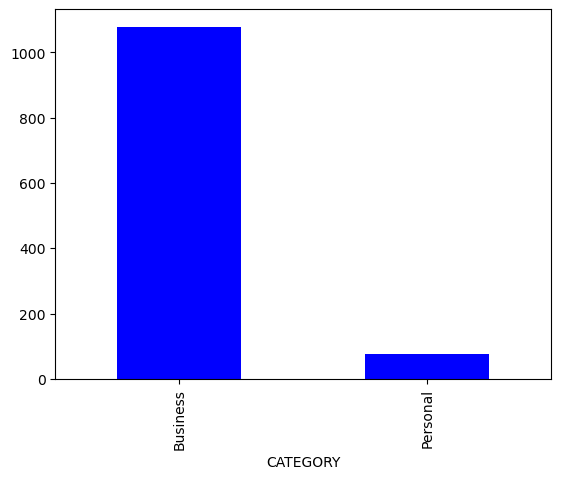

In [101]:
df['CATEGORY'].value_counts().plot(kind='bar', color='b')

In [19]:
#this code to show uniqu value in coulmn and store this value
start_point = df.START.value_counts()
start_point

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: count, Length: 177, dtype: int64

In [20]:
start_point.head()

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Name: count, dtype: int64

<Axes: ylabel='count'>

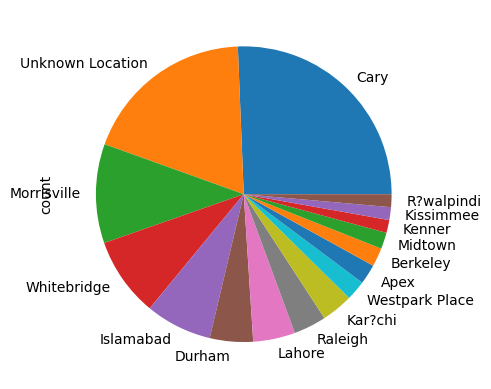

In [21]:
# show more than 10 frquecy just  in this coulumn
start_point[start_point>10].plot(kind = 'pie')

<Axes: ylabel='count'>

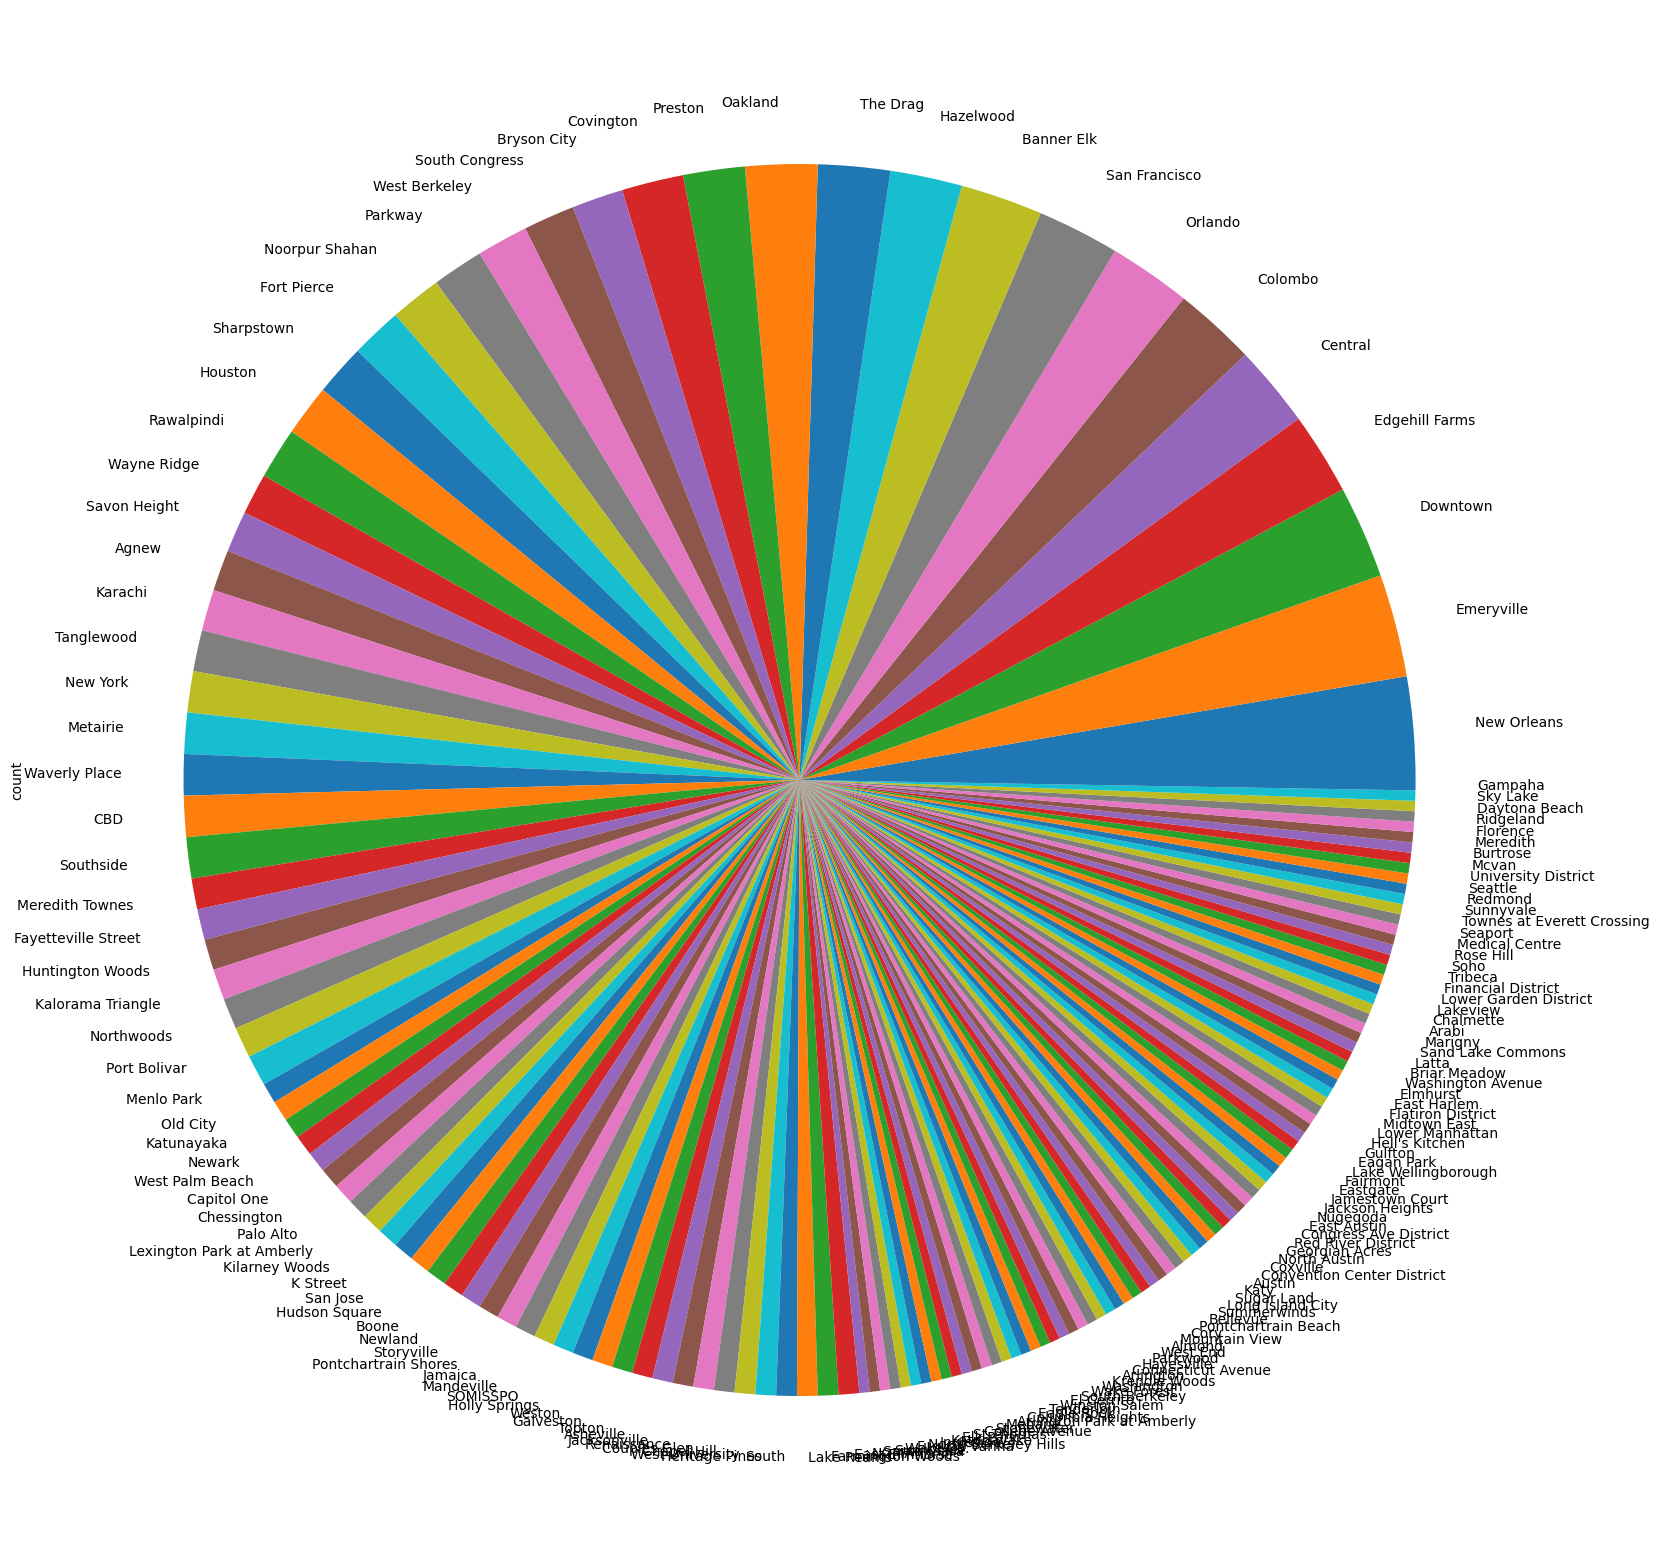

In [22]:
# show more than 10 frequcey and less than in this column
plt.figure(figsize=(20,20))
start_point[start_point<=10].plot(kind = 'pie')

In [23]:
#show the value uniqu in column
stop_point = df.STOP.value_counts()
stop_point

STOP
Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: count, Length: 188, dtype: int64

In [102]:
print(stop_point[stop_point > 10])

STOP
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Name: count, dtype: int64


In [24]:
#show the 5 fisrt value in column 
stop_point.head()

STOP
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Name: count, dtype: int64

<Axes: ylabel='count'>

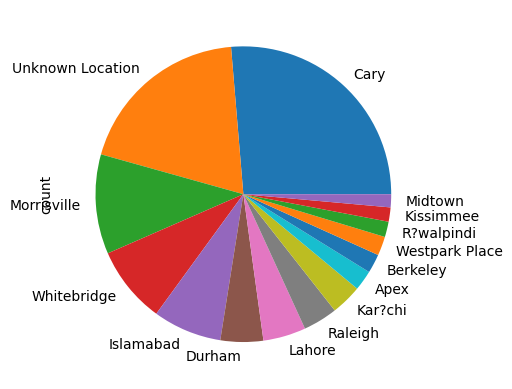

In [25]:
stop_point[stop_point>10].plot(kind = 'pie')

<Axes: ylabel='count'>

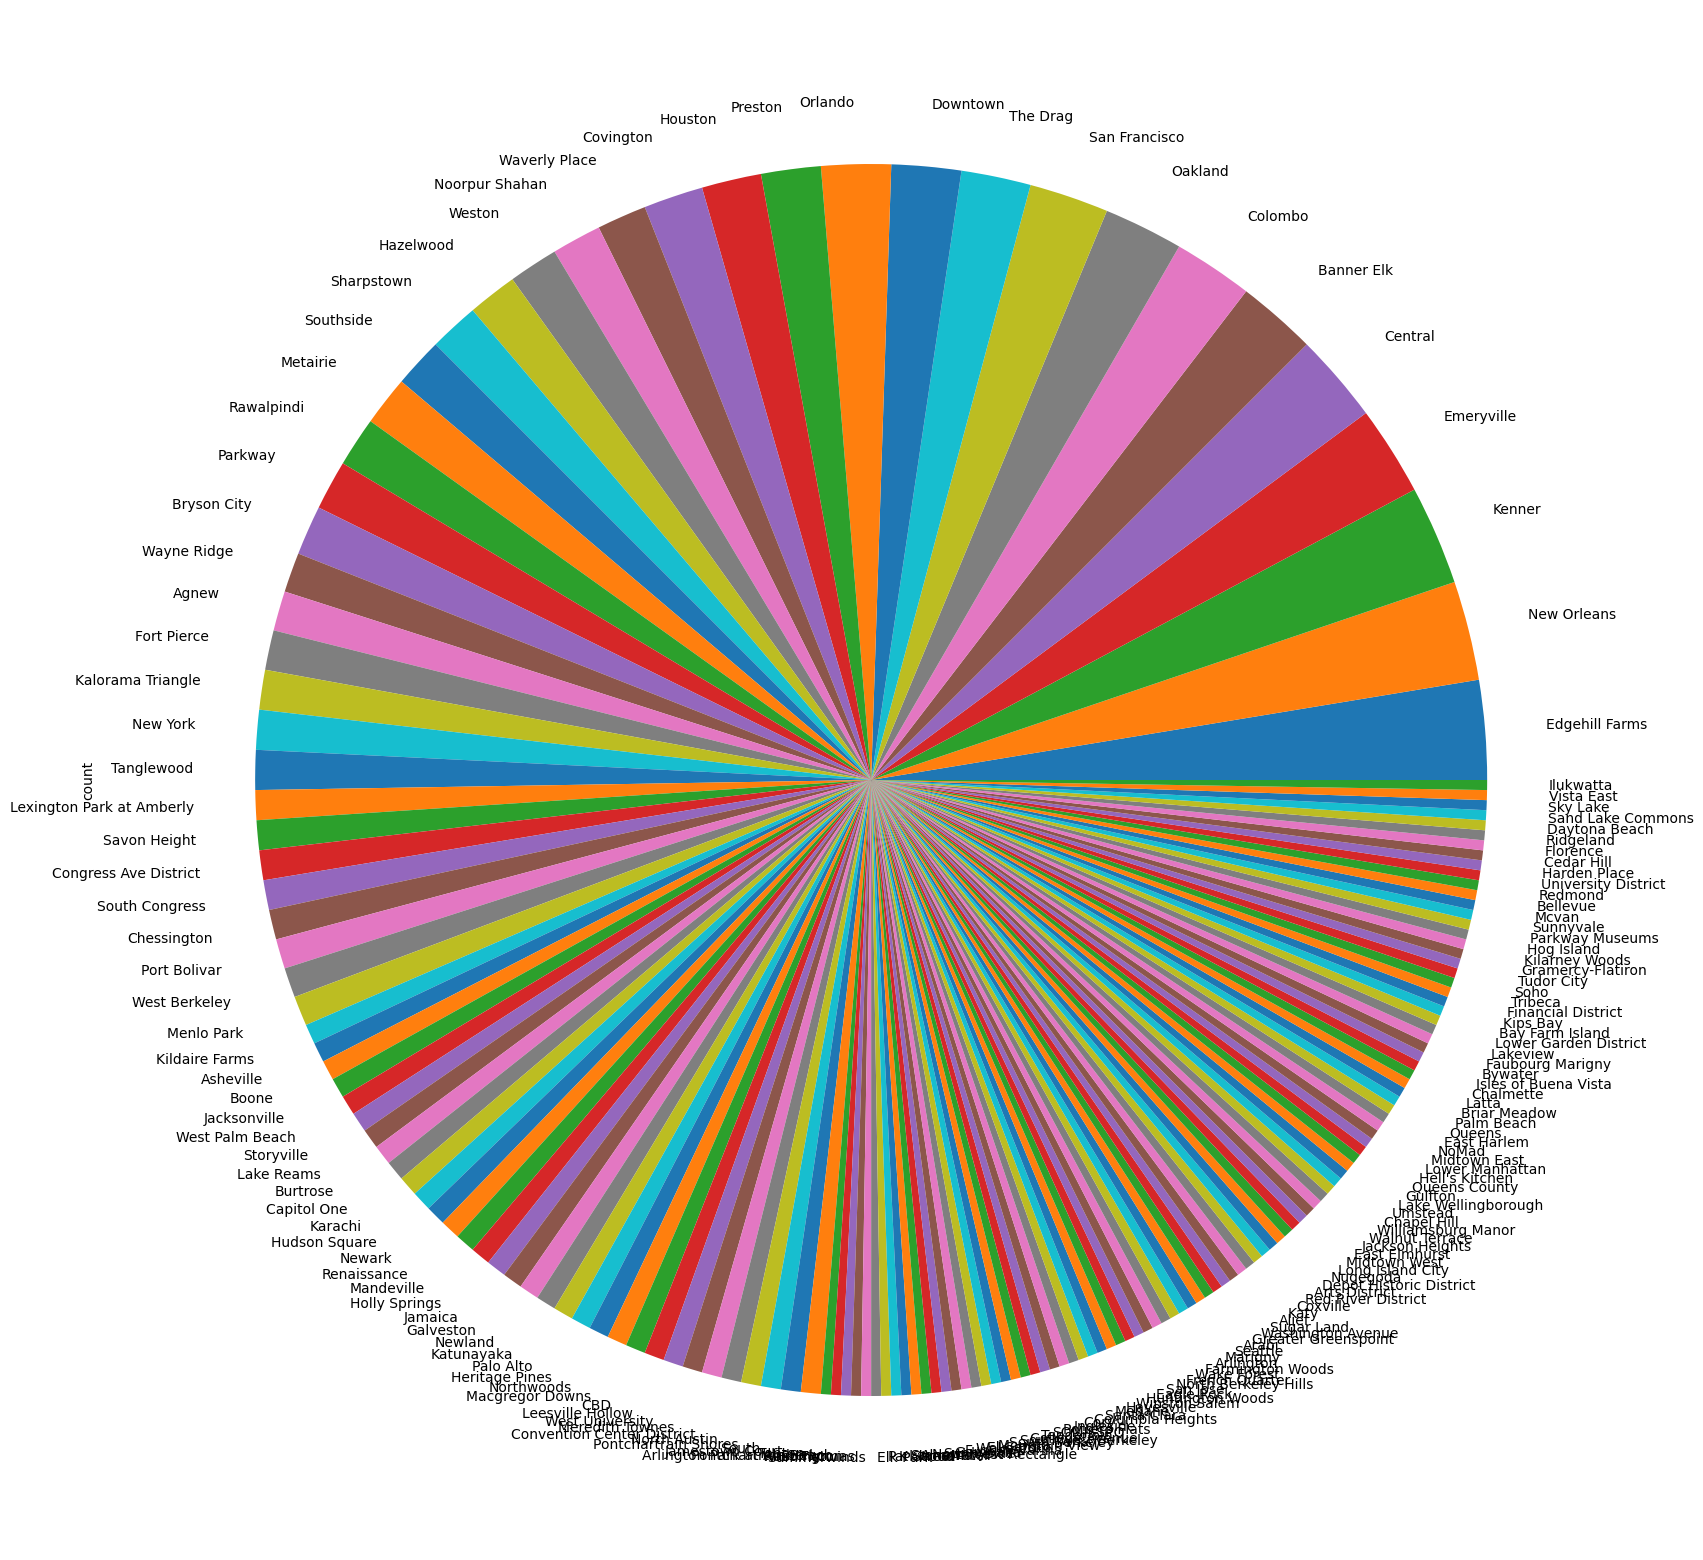

In [26]:
plt.figure(figsize = (20,20))
stop_point[stop_point<=10].plot(kind = 'pie')

In [27]:
miles = df.MILES.value_counts()
miles


MILES
9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
        ..
46.9     1
40.2     1
16.6     1
19.3     1
48.2     1
Name: count, Length: 256, dtype: int64

<Axes: xlabel='MILES'>

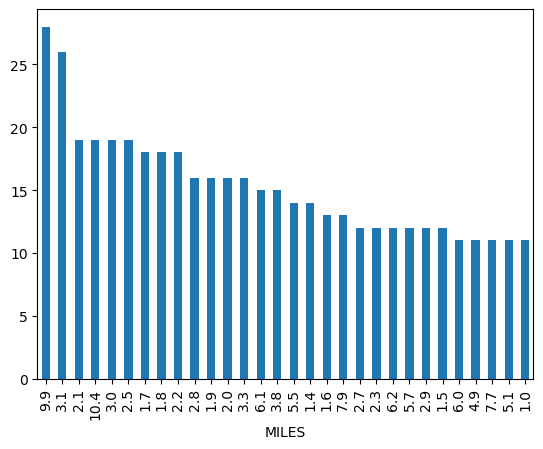

In [106]:
miles[miles > 10].plot(kind = 'bar')

<Axes: ylabel='count'>

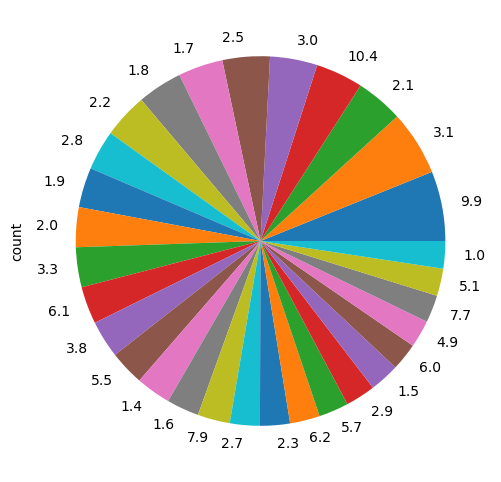

In [29]:
plt.figure(figsize = (6, 6))
miles[miles > 10].plot(kind = 'pie')


<Axes: xlabel='PURPOSE'>

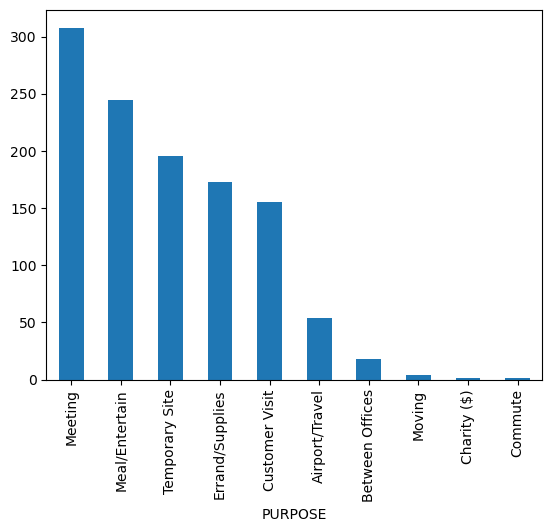

In [30]:
df.PURPOSE.value_counts().plot(kind = 'bar')


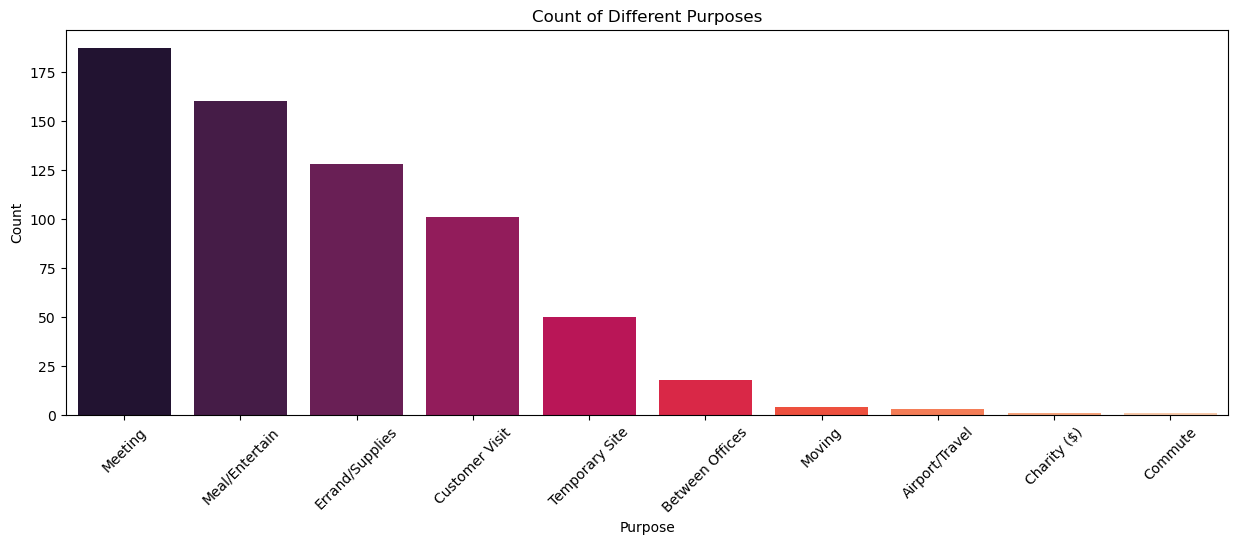

In [120]:
order = df['PURPOSE'].value_counts().index
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='PURPOSE', order=order, palette='rocket', saturation=1)
plt.xticks(rotation=45)
plt.title('Count of Different Purposes')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

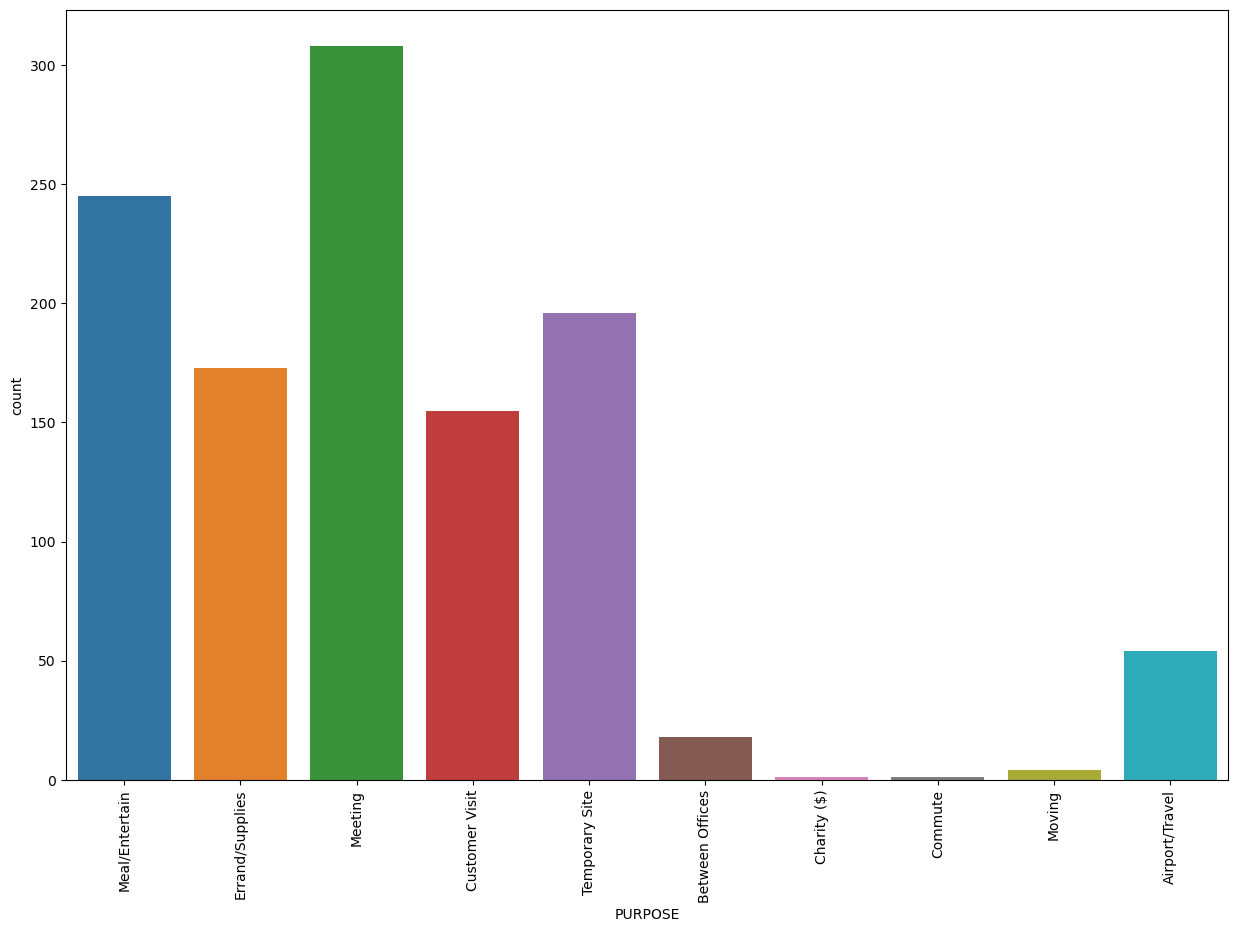

In [31]:

plt.figure(figsize=(15, 10))
sns.countplot(x='PURPOSE', data=df)
plt.xticks(rotation=90)  
plt.show()


In [32]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,NaT,NaT,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site


In [33]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')


In [34]:
print(df['START_DATE'].dtype)  # يجب أن يكون datetime64[ns]
print(df['END_DATE'].dtype)    # يجب أن يكون datetime64[ns]


datetime64[ns]
datetime64[ns]


In [35]:
df['MINUTES'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60


In [36]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [37]:
df['DURATION'] = df['END_DATE'] - df['START_DATE']


In [38]:
df['MINUTES'] = df['DURATION'].dt.total_seconds() / 60


In [39]:
print(df['START_DATE'].dtype)  
print(df['END_DATE'].dtype)    
print(df['DURATION'].dtype)    


datetime64[ns]
datetime64[ns]
timedelta64[ns]


In [40]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,0 days 01:07:00


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

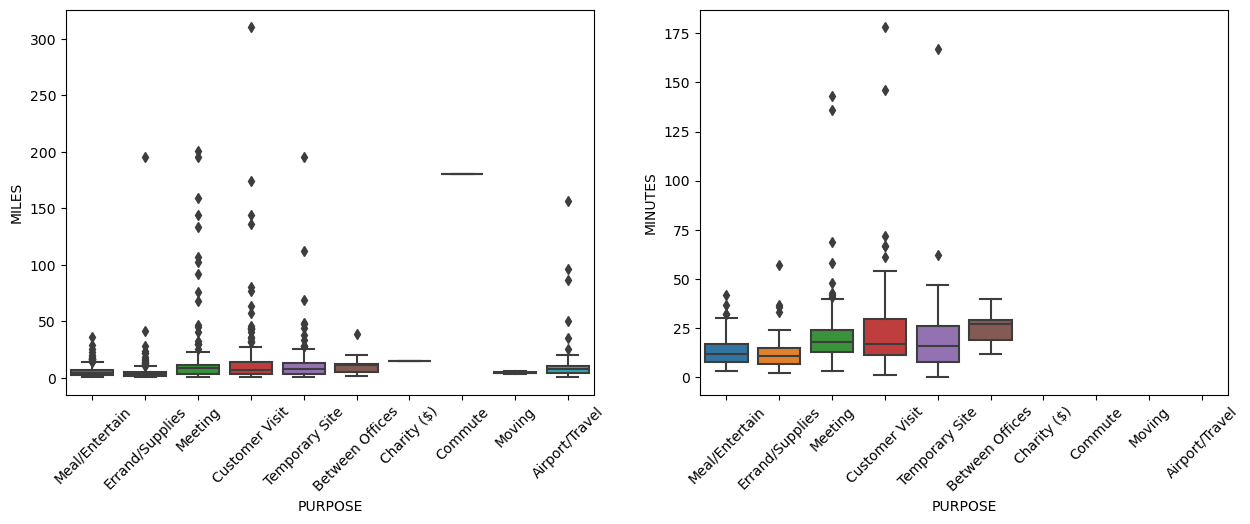

In [41]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(data = df, x = df['PURPOSE'], y = df['MILES'])
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.boxplot(data = df, x = df['PURPOSE'], y = df['MINUTES'])
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

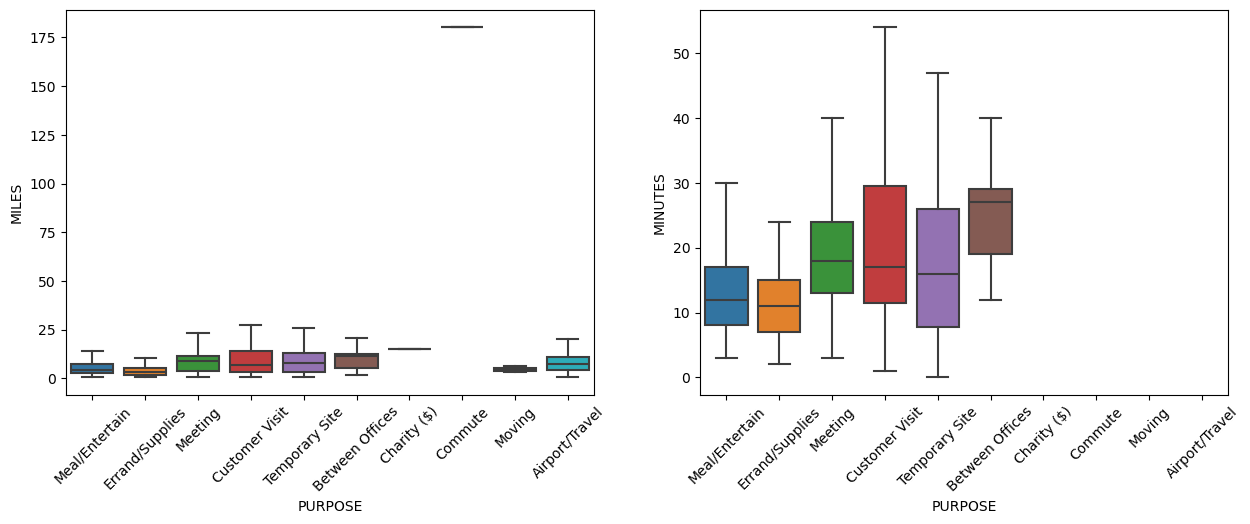

In [42]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(data = df, x = df['PURPOSE'], y = df['MILES'], showfliers = False)
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.boxplot(data = df, x = df['PURPOSE'], y = df['MINUTES'], showfliers = False)
plt.xticks(rotation = 45)

# For each purpose what is minimum miles travelled, mean miles travelled and what is maximum miles travelled?

In [55]:
pd.DataFrame({'Min': df.groupby(['PURPOSE'])['MILES'].min(),
             'Mean': df.groupby(['PURPOSE'])['MILES'].mean(),
             'Max': df.groupby(['PURPOSE'])['MILES'].max()})

,Min,Mean,Max
PURPOSE,,,
Airport/Travel,0.9,14.953704,156.9
Between Offices,1.9,10.944444,39.2
Charity ($),15.1,15.100000,15.1
Commute,180.2,180.200000,180.2
Customer Visit,0.6,16.065806,310.3
Errand/Supplies,0.5,5.928902,195.3
Meal/Entertain,0.6,5.773878,36.5
Meeting,0.7,12.652597,201.0
Moving,3.3,4.550000,6.1


# For each purpose what is minimum minutes travelled, mean minutes travelled and what is maximum minutes travelled?

In [56]:
pd.DataFrame({'Min': df.groupby(['PURPOSE'])['MINUTES'].min(),
             'Mean': df.groupby(['PURPOSE'])['MINUTES'].mean(),
             'Max': df.groupby(['PURPOSE'])['MINUTES'].max()})

,Min,Mean,Max
PURPOSE,,,
Airport/Travel,NaN,NaN,NaN
Between Offices,12.0,25.666667,40.0
Charity ($),NaN,NaN,NaN
Commute,NaN,NaN,NaN
Customer Visit,1.0,25.866667,178.0
Errand/Supplies,2.0,13.218182,57.0
Meal/Entertain,3.0,13.774194,42.0
Meeting,3.0,21.456897,143.0
Moving,NaN,NaN,NaN


In [57]:
# ckick the missing value in column 'MINUTES'
print(df['MINUTES'].isna().sum())

 #ckick the missing value in column 'PURPOSE'
print(df['PURPOSE'].isna().sum())


735
0


In [62]:
df['MINUTES'].fillna(0, inplace=True)  


In [64]:
pd.DataFrame({'Min': df.groupby(['PURPOSE'])['MINUTES'].min(),
             'Mean': df.groupby(['PURPOSE'])['MINUTES'].mean(),
             'Max': df.groupby(['PURPOSE'])['MINUTES'].max()})


,Min,Mean,Max
PURPOSE,,,
Airport/Travel,0.0,0.000000,0.0
Between Offices,0.0,12.833333,40.0
Charity ($),0.0,0.000000,0.0
Commute,0.0,0.000000,0.0
Customer Visit,0.0,12.516129,178.0
Errand/Supplies,0.0,4.202312,57.0
Meal/Entertain,0.0,5.228571,42.0
Meeting,0.0,8.081169,143.0
Moving,0.0,0.000000,0.0


In [47]:
df.groupby('PURPOSE')['MILES'].describe()

,count,mean,std,min,25%,50%,75%,max
PURPOSE,,,,,,,,
Airport/Travel,54.0,14.953704,26.588696,0.9,4.325,7.45,10.875,156.9
Between Offices,18.0,10.944444,8.458913,1.9,5.200,11.60,12.350,39.2
Charity ($),1.0,15.100000,NaN,15.1,15.100,15.10,15.100,15.1
Commute,1.0,180.200000,NaN,180.2,180.200,180.20,180.200,180.2
Customer Visit,155.0,16.065806,33.665367,0.6,3.150,6.90,13.950,310.3
Errand/Supplies,173.0,5.928902,15.429904,0.5,1.900,3.20,5.300,195.3
Meal/Entertain,245.0,5.773878,4.931104,0.6,2.500,4.20,7.200,36.5
Meeting,308.0,12.652597,23.597450,0.7,3.800,8.80,11.600,201.0
Moving,4.0,4.550000,1.181807,3.3,3.900,4.40,5.050,6.1


In [48]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'MINUTES', 'DURATION'],
      dtype='object')

In [49]:
def round(x):
    if x['START'] == x['STOP']:
        return 'Yes'
    else:
        return 'No'

In [50]:
df['ROUND_TRIP'] = df.apply(round, axis = 1)


In [52]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,DURATION,ROUND_TRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,0 days 00:06:00,Yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,0 days 00:12:00,Yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,0 days 00:13:00,Yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,0 days 00:14:00,Yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,0 days 01:07:00,No


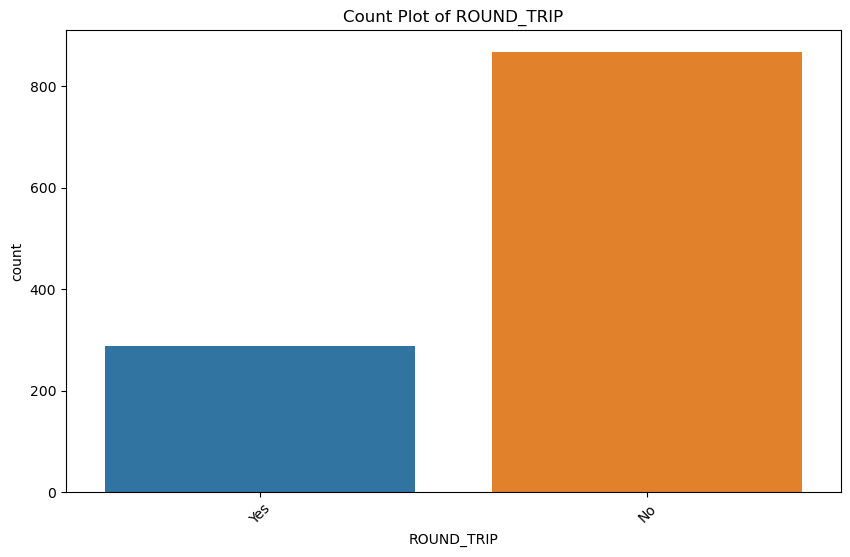

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ROUND_TRIP')
plt.title('Count Plot of ROUND_TRIP')
plt.xticks(rotation=45)
plt.show()

In [65]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,DURATION,ROUND_TRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,0 days 00:06:00,Yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,0 days 00:12:00,Yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,0 days 00:13:00,Yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,0 days 00:14:00,Yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,0 days 01:07:00,No


In [66]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month

In [67]:
dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

In [68]:
df['MONTH'] = df['MONTH'].map(dict)

In [69]:
df.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,DURATION,ROUND_TRIP,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,0 days 00:06:00,Yes,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,0 days 00:12:00,Yes,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,0 days 00:13:00,Yes,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,0 days 00:14:00,Yes,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,0 days 01:07:00,No,Jan


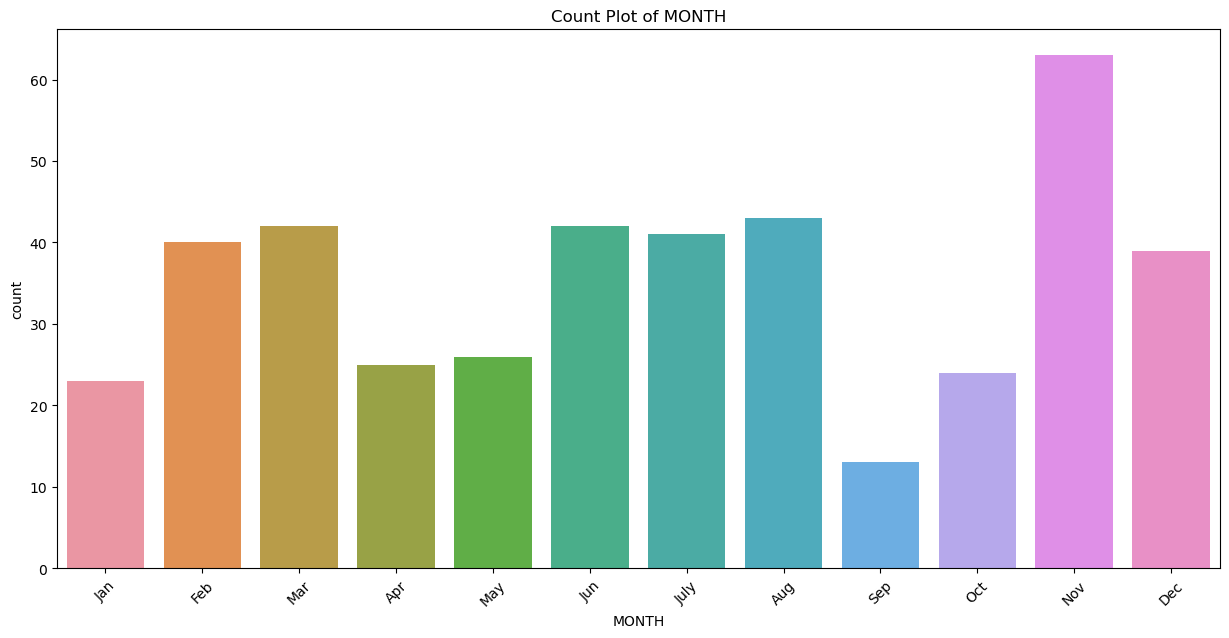

In [71]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='MONTH')
plt.title('Count Plot of MONTH')
plt.xticks(rotation=45)
plt.show()


In [72]:
pd.set_option('display.max_rows',None)

In [73]:
df.groupby(['MONTH','PURPOSE'])['ROUND_TRIP'].count()

MONTH  PURPOSE        
Apr    Customer Visit      5
       Errand/Supplies     3
       Meal/Entertain      5
       Meeting            12
Aug    Customer Visit     19
       Meal/Entertain     11
       Meeting            13
Dec    Customer Visit     11
       Errand/Supplies    11
       Meal/Entertain     10
       Meeting             6
       Temporary Site      1
Feb    Between Offices     1
       Customer Visit      5
       Errand/Supplies     5
       Meal/Entertain     16
       Meeting             8
       Temporary Site      5
Jan    Customer Visit      3
       Errand/Supplies     4
       Meal/Entertain      7
       Meeting             8
       Temporary Site      1
July   Customer Visit      1
       Errand/Supplies     6
       Meal/Entertain      2
       Meeting            14
       Temporary Site     18
Jun    Between Offices     1
       Customer Visit      3
       Errand/Supplies    13
       Meal/Entertain     11
       Meeting            14
Mar    Between Offic

# Minutes taken to cover miles?

<Axes: xlabel='MINUTES', ylabel='MILES'>

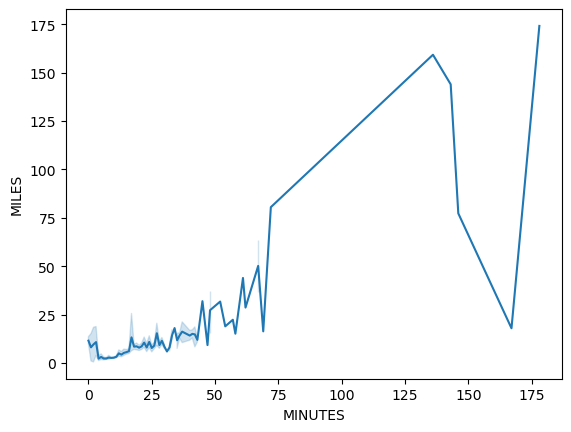

In [74]:
sns.lineplot(data = df, x = df['MINUTES'], y = df['MILES'])

# Distribution of cab rides based on category

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

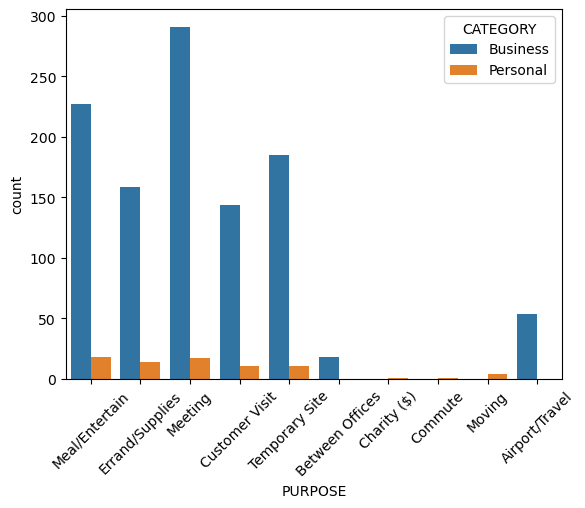

In [75]:
sns.countplot(data = df, x = df['PURPOSE'], hue = 'CATEGORY')
plt.xticks(rotation = 45)

# Where do customers most frequently take cabs OR frequency of cab rides start points

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Westpark Place'),
  Text(10, 0, 'Apex'),
  Text(11, 0, 'Berkeley'),
  Text(12, 0, 'Midtown'),
  Text(13, 0, 'Kenner'),
  Text(14, 0, 'Kissimmee'),
  Text(15, 0, 'R?walpindi'),
  Text(16, 0, 'New Orleans'),
  Text(17, 0, 'Emeryville'),
  Text(18, 0, 'Downtown'),
  Text(19, 0, 'Edgehill Farms'),
  Text(20, 0, 'Central'),
  Text(21, 0, 'Colombo'),
  Text(22, 0, 'Orlando'),
  Text(23, 0, 'San Francisco'),
  Text(24, 0, 'Banner Elk')])

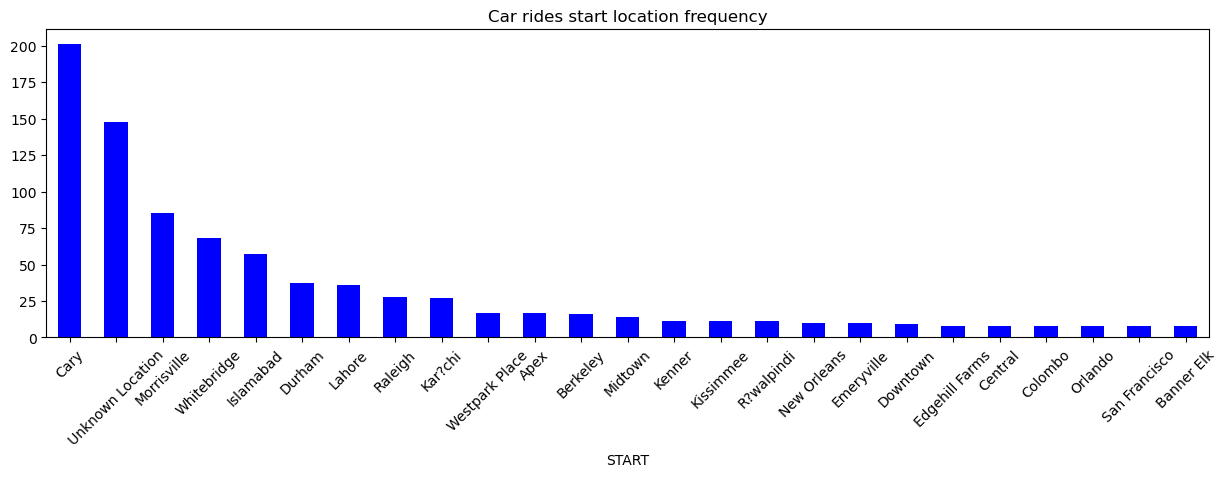

In [134]:
plt.figure(figsize = (15,4))
pd.Series(df['START']).value_counts()[:25].plot(kind = 'bar', color = 'b')
plt.title('Car rides start location frequency')
plt.xticks(rotation = 45)

# Frequency of car rides stop points

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Apex'),
  Text(10, 0, 'Berkeley'),
  Text(11, 0, 'Westpark Place'),
  Text(12, 0, 'R?walpindi'),
  Text(13, 0, 'Kissimmee'),
  Text(14, 0, 'Midtown'),
  Text(15, 0, 'Edgehill Farms'),
  Text(16, 0, 'New Orleans'),
  Text(17, 0, 'Kenner'),
  Text(18, 0, 'Emeryville'),
  Text(19, 0, 'Central'),
  Text(20, 0, 'Banner Elk'),
  Text(21, 0, 'Colombo'),
  Text(22, 0, 'Oakland'),
  Text(23, 0, 'San Francisco'),
  Text(24, 0, 'The Drag')])

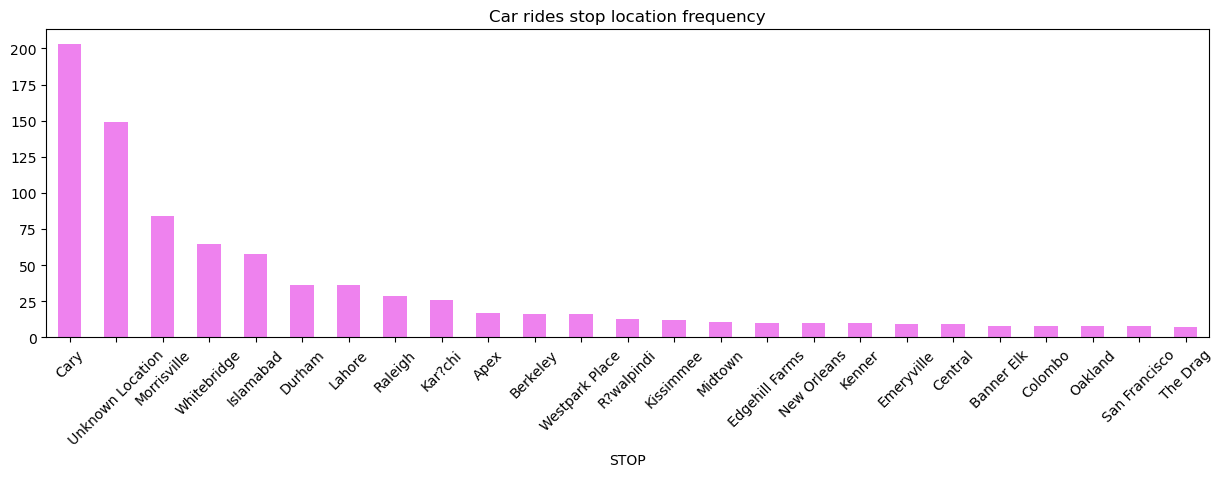

In [135]:
plt.figure(figsize = (15,4))
pd.Series(df['STOP']).value_counts()[:25].plot(kind = 'bar', color = 'violet')
plt.title('Car rides stop location frequency')
plt.xticks(rotation = 45)


# Conclusions
# Business cabs were not only used more in volume but also have travelled more distance 
Round trips were more in december.# 
December can prove to be the best month for earning profit by raising fare as demand is more.
Seasonal pattern is ther# e.
Cab traffic was high in just 5 cities comparative# ly.
Most of the cab rides are within a distance of 35 miles taking about 30 minu# tes.
For airport, cab rides are taking more time than usual

# December have most bookings - indicates Christmas and end year rush

# Most bookings are for business

# Between offices and airport is totally business trips

# Cary is most frequent start and stop location


# 3-12 miles is the usual distance travelled

# Most trips are for meeting purposes

# Usually we don't have round trips

# Average time is 23 minutes for trips

# Max cabs were booked for meal and entertainment in month of March.
